# Importing necessary libraries

In [2]:
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Loading dataset 

In [3]:
train  = pd.read_csv('train_E6oV3lV.csv')

## Data inspection

In [4]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
train.shape

(31962, 3)

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

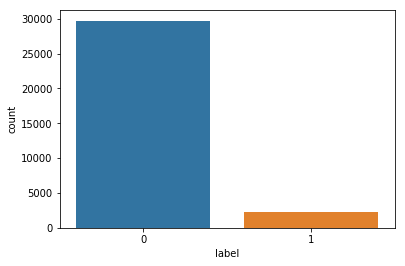

In [7]:
sns.countplot(x='label',data=train)

# statistics of raw tweets

In [8]:
train['tweet'].describe()

count                                                 31962
unique                                                29530
top       #model   i love u take with u all the time in ...
freq                                                    319
Name: tweet, dtype: object

In [110]:
arr1 = []
for i in train['tweet']:
    arr1.append(len(str(i)))
#print(arr1)


[102 122  21 ...  63  67  32]
mean of the length of words: 84.73962830861649
median of the length of words: 88.0
max of the length of words: 274
min of the length of words: 11


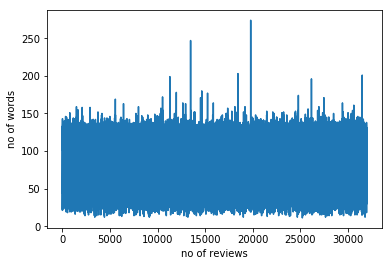

In [111]:
arr1nd =np.array(arr1)
print(arr1nd)
print("mean of the length of words: {}".format(np.mean(arr1nd)))
print("median of the length of words: {}".format(np.median(arr1nd)))
print("max of the length of words: {}".format(np.max(arr1nd)))
print("min of the length of words: {}".format(np.min(arr1nd)))
plt.plot(arr1nd)
plt.xlabel("no of reviews")
plt.ylabel("no of words")
plt.show()


## Data Cleaning

In [25]:
#function to remove unwanted text

In [26]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for i in r:
        input_text=re.sub(i,'',input_text)
    return input_text

## #removing twitter handles

In [27]:
train['tidy_tweet']=np.vectorize(remove_pattern)(train['tweet'],'@[\w]*')

In [28]:
train.head(10)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


## #removing punctuations,numbers and special chars 

In [29]:
train['tidy_tweet']=train['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [30]:
train.head(10)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


## #removing short words

In [31]:
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [32]:
train.head(10)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here


## Tokenization

In [33]:
tokenized_tweet=train['tidy_tweet'].apply(lambda x:x.split())

In [34]:
tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: tidy_tweet, dtype: object

## Removing stopwords

In [35]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
for i in range(len(tokenized_tweet)):
     tokenized_tweet[i]=[w for w in tokenized_tweet[i] if w not in stop_words]
tokenized_tweet.head(10)

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, leave, chaos, disputes, ...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, #scho...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                            [welcome]
Name: tidy_tweet, dtype: object

## Stemming(normalizing)

In [36]:
## normalizing the tokenized tweets
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweet

0        [father, dysfunct, selfish, drag, kid, dysfunc...
1        [thank, #lyft, credit, caus, offer, wheelchair...
2                                        [bihday, majesti]
3                               [#model, love, take, time]
4                             [factsguid, societi, #motiv]
5        [huge, fare, talk, leav, chao, disput, #allsho...
6                                  [camp, tomorrow, danni]
7        [next, school, year, year, exam, think, #schoo...
8        [love, land, #allin, #cav, #champion, #clevela...
9                                                 [welcom]
10       [#ireland, consum, price, index, climb, previo...
11       [selfish, #orlando, #standwithorlando, #pulses...
12                          [daddi, today, day, #gettingf]
13       [#cnn, call, #michigan, middl, school, build, ...
14       [comment, #australia, #opkillingbay, #seasheph...
15       [ouch, junior, angri, #got, #junior, #yugyoem,...
16                          [thank, paner, #thank, #posi

In [80]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [81]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
train['tidy_tweet']=tokenized_tweet

# Reducing the dataset

In [85]:
train_pos = train[train.label==1]
train_neg = train[train.label==0]

In [108]:
train_1 = train_pos[:500]
train_2 = train_neg[:500]
frames = [train_1, train_2]
red_train = pd.concat(frames)
print(red_train.shape)
print(red_train['label'].value_counts())
red_train.head()

(1000, 4)
1    500
0    500
Name: label, dtype: int64


,id,label,tweet,tidy_tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...,#cnn call #michigan middl school build wall ch...
14,15,1,no comment! in #australia #opkillingbay #se...,comment #australia #opkillingbay #seashepherd ...
17,18,1,retweet if you agree!,retweet agre
23,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpi say prove lumpi
34,35,1,it's unbelievable that in the 21st century we'...,unbeliev centuri need someth like #neverump #x...


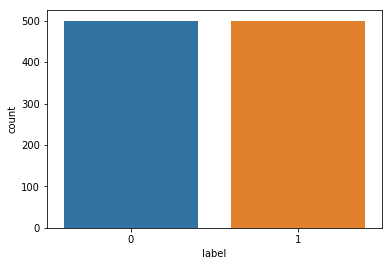

In [87]:
sns.countplot(x='label',data=red_train)

# Statistics of cleaned tweets

[74, 101, 22, 47, 104, 39, 110, 87, 77, 129, 82, 106, 112, 111, 98, 63, 111, 133, 101, 108, 103, 47, 100, 111, 63, 81, 127, 120, 83, 121, 90, 90, 88, 98, 119, 119, 57, 42, 68, 97, 82, 122, 29, 73, 63, 109, 99, 50, 52, 111, 116, 80, 88, 77, 62, 109, 111, 104, 89, 46, 96, 131, 110, 63, 111, 105, 58, 96, 91, 106, 133, 108, 103, 129, 74, 67, 120, 124, 103, 125, 120, 86, 97, 80, 141, 67, 114, 115, 68, 130, 93, 40, 111, 110, 120, 105, 83, 117, 99, 90, 55, 124, 34, 132, 97, 116, 42, 107, 104, 123, 61, 74, 110, 101, 118, 40, 99, 124, 91, 76, 103, 98, 49, 72, 69, 96, 52, 123, 112, 137, 77, 29, 100, 90, 63, 99, 60, 43, 115, 35, 121, 34, 29, 108, 99, 86, 120, 116, 57, 126, 107, 107, 65, 118, 26, 61, 63, 98, 96, 61, 80, 116, 119, 102, 63, 99, 38, 91, 123, 95, 136, 49, 61, 121, 106, 111, 38, 115, 110, 121, 132, 90, 81, 112, 36, 94, 39, 132, 84, 82, 121, 78, 63, 50, 70, 118, 26, 74, 77, 99, 118, 109, 50, 66, 62, 113, 111, 108, 42, 46, 63, 78, 127, 110, 84, 119, 63, 69, 103, 109, 94, 102, 44, 118, 11

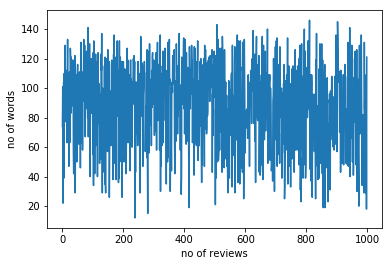

In [109]:
arr1 = []
for i in red_train['tweet']:
    arr1.append(len(str(i)))
print(arr1)
arr1nd =np.array(arr1)
print(arr1nd)
print("mean of the length of words: {}".format(np.mean(arr1nd)))
print("median of the length of words: {}".format(np.median(arr1nd)))
print("max of the length of words: {}".format(np.max(arr1nd)))
print("min of the length of words: {}".format(np.min(arr1nd)))
plt.plot(arr1nd)
plt.xlabel("no of reviews")
plt.ylabel("no of words")
plt.show()

# Applying bag-of-words on the text

In [89]:
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

In [90]:
bow_vec=CountVectorizer()
bow=bow_vec.fit_transform(red_train['tidy_tweet'])  

In [91]:
print(bow.shape,red_train['label'].shape)
from scipy.sparse import csr_matrix 
bow = csr_matrix(bow).toarray()
#red_train['label']

(1000, 3068) (1000,)


##  Splitting dataset into test and train after bow

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,red_train['label'],test_size=0.2,random_state=41)

## Fitting naive bayes to data after applying bow

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)
pred1=naive.predict(x_train)
pred2=naive.predict(x_test)
acc1=accuracy_score(y_train,pred1)
print("the training accuracy with naive bayes is:{}".format(acc1))
acc2=accuracy_score(y_test,pred2)
print('the testing accuracy with naive bayes is:{}'.format(acc2))
f1 = f1_score(y_train,pred1)
print('the f1 score for training data:{}'.format(f1))
f2 = f1_score(y_test,pred2)
print('the f1 score for testing data:{}'.format(f2))


the training accuracy with naive bayes is:0.9925
the testing accuracy with naive bayes is:0.78
the f1 score for training data:0.9927710843373494
the f1 score for testing data:0.7317073170731707


## Fitting knn

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv=5, scoring="accuracy")
clf.fit(x_train,y_train)
clf.best_params_

{'n_neighbors': 1}

In [95]:
neigh = KNeighborsClassifier(n_neighbors=1,)
neigh.fit(x_train,y_train)
pred3=neigh.predict(x_train)
acc3=accuracy_score(pred3,y_train)
print("the training accuracy with KNN was:{}".format(acc3))
pred4=neigh.predict(x_test)
acc4=accuracy_score(pred4,y_test)
print("the teesting accuracy with KNN was:{}".format(acc4))
f3= f1_score(y_train,pred3)
print('the f1 score for training data:{}'.format(f3))
f4 = f1_score(y_test,pred4)
print('the f1 score for testing data:{}'.format(f4))

the training accuracy with KNN was:1.0
the teesting accuracy with KNN was:0.665
the f1 score for training data:1.0
the f1 score for testing data:0.524822695035461


## Fitting logistic regression

In [169]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty':["l1","l2"],
             'C':[0.0001, 0.001, 0.01, 0.1, 1, 10],
             }
logi = LogisticRegression()
clf = GridSearchCV(logi, parameters, cv=5, scoring="accuracy")
clf.fit(x_train,y_train)
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [172]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.1, penalty="l2")
log.fit(x_train,y_train)
pred5=log.predict(x_train)
acc5=accuracy_score(pred5,y_train)
print("the training accuracy with logistic Regression is:{}".format(acc5))
pred6=log.predict(x_test)
acc6=accuracy_score(pred6,y_test)
print("the testing accuracy with logistic Regression is:{}".format(acc6))
f5 = f1_score(y_train,pred5)
print('the f1 score for training data:{}'.format(f5))
f6 = f1_score(y_test,pred6)
print('the f1 score for testing data:{}'.format(f6))
from sklearn.metrics import confusion_matrix
con = confusion_matrix(pred6,y_test)
print("confusion matrix is {}".format(con))
from sklearn.metrics import classification_report
print(classification_report(pred6, y_test))

the training accuracy with logistic Regression is:0.96875
the testing accuracy with logistic Regression is:0.815
the f1 score for training data:0.970131421744325
the f1 score for testing data:0.8021390374331552
confusion matrix is [[88  7]
 [30 75]]
             precision    recall  f1-score   support

          0       0.75      0.93      0.83        95
          1       0.91      0.71      0.80       105

avg / total       0.83      0.81      0.81       200



In [173]:
rand=[76,5,9,34,62,19]
for i in rand:
    log = LogisticRegression(C=10, penalty="l2",random_state=i)
    log.fit(x_train,y_train)
    pred5=log.predict(x_train)
    acc5=accuracy_score(pred5,y_train)
    print("the training accuracy with {} is:{}".format(i,acc5))
    pred6=log.predict(x_test)
    acc6=accuracy_score(pred6,y_test)
    print("the testing accuracy with {} is:{}".format(i,acc6))

the training accuracy with 76 is:1.0
the testing accuracy with 76 is:0.835
the training accuracy with 5 is:1.0
the testing accuracy with 5 is:0.835
the training accuracy with 9 is:1.0
the testing accuracy with 9 is:0.835
the training accuracy with 34 is:1.0
the testing accuracy with 34 is:0.835
the training accuracy with 62 is:1.0
the testing accuracy with 62 is:0.835
the training accuracy with 19 is:1.0
the testing accuracy with 19 is:0.835


## Fitting decision tree

In [98]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
parameters = {'criterion':["gini", "entropy"],
             'max_depth':[2,3,4,5,6,7,8],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3,4]}
clf = GridSearchCV(dec_tree, parameters, cv=5, scoring="accuracy")
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [99]:
from sklearn import tree
dec_tree= tree.DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_leaf=1, min_samples_split=4)
dec_tree.fit(x_train,y_train)
pred7=dec_tree.predict(x_train)
acc7=accuracy_score(pred7,y_train)
print("the training accuracy with decision tree is:{}".format(acc7))
pred8=dec_tree.predict(x_test)
acc8=accuracy_score(pred8,y_test)
print("the testing accuracy with decission tree was:{}".format(acc8))
f7 = f1_score(y_train,pred7)
print('the f1 score for training data:{}'.format(f7))
f8 = f1_score(y_test,pred8)
print('the f1 score for testing data:{}'.format(f8))

the training accuracy with decision tree is:0.6425
the testing accuracy with decission tree was:0.71
the f1 score for training data:0.4799999999999999
the f1 score for testing data:0.45283018867924524


## Fitting random forest

In [100]:
from sklearn.ensemble import RandomForestClassifier 
random = RandomForestClassifier()
parameters = {'n_estimators':[20, 40, 60, 80, 100, 150, 200, 250, 300],
             'max_depth':[2,3,4,5,6,7,8]}
clf = GridSearchCV(random, parameters, cv=5, scoring="accuracy") 
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [101]:
from sklearn.ensemble import RandomForestClassifier 
random = RandomForestClassifier(n_estimators=200, max_depth=8) 
random.fit(x_train,y_train)   
pred9 = random.predict(x_train)   
acc9 = accuracy_score(y_train, pred9, normalize=True) * float(100)   
print('\nTrain accuracy for n_estimators = %d is %d%%' % (200, acc9))
f9 = f1_score(y_train,pred9)
print('\nTrain fscore for n_estimators = %d is %d%%' % (200, f9))
pred10 = random.predict(x_test)   
acc10 = accuracy_score(y_test, pred10, normalize=True) * float(100)   
print('\nTest accuracy for n_estimators = %d is %d%%' % (200, acc10))
f10 = f1_score(y_test,pred10)
print('\nTest fscore for n_estimators = %d is %d%%' % (200, f10))


Train accuracy for n_estimators = 200 is 79%

Train fscore for n_estimators = 200 is 0%

Test accuracy for n_estimators = 200 is 67%

Test fscore for n_estimators = 200 is 0%


## Testing on new data


In [102]:
a=['&amp; #love &amp; #hugs &amp; #kisses too! how to keep your #baby     #parenting #healthcare']
a=bow_vec.transform(a)

In [103]:
a.shape
type(bow_vec)

sklearn.feature_extraction.text.CountVectorizer

In [104]:
al=random.predict(a)

In [112]:
print(al)

[0]


In [113]:

al=log.predict(a)

In [114]:
print(al)

[0]


In [115]:
al=dec_tree.predict(a)
print(al)

[0]


In [116]:
al=naive.predict(a.toarray())
print(al)

[0]


In [117]:
al=neigh.predict(a.toarray())
print(al)

[0]


# Applying Tf-Idf on the tweets

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_vec = vectorizer.fit_transform(red_train['tidy_tweet'])
tf_idf = csr_matrix(tf_idf_vec).toarray()
#print(vectorizer.get_feature_names())
print(tf_idf.shape)

(1000, 3068)


In [178]:
x_train,x_test,y_train,y_test=train_test_split(tf_idf,red_train['label'],test_size=0.2,random_state=41)

## Fitting naive bayes

In [120]:
naive=GaussianNB()
naive.fit(x_train,y_train)
pred1=naive.predict(x_train)
pred2=naive.predict(x_test)
acc1=accuracy_score(y_train,pred1)
print("the training accuracy with naive bayes is:{}".format(acc1))
acc2=accuracy_score(y_test,pred2)
print('the testing accuracy with naive bayes is:{}'.format(acc2))
f1 = f1_score(y_train,pred1)
print('the f1 score for training data:{}'.format(f1))
f2 = f1_score(y_test,pred2)
print('the f1 score for testing data:{}'.format(f2))


the training accuracy with naive bayes is:0.99375
the testing accuracy with naive bayes is:0.775
the f1 score for training data:0.9939831528279182
the f1 score for testing data:0.739884393063584


## Fitting knn

In [121]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv=5, scoring="accuracy")
clf.fit(x_train,y_train)
clf.best_params_

{'n_neighbors': 7}

In [122]:
neigh = KNeighborsClassifier(n_neighbors=7,)
neigh.fit(x_train,y_train)
pred3=neigh.predict(x_train)
acc3=accuracy_score(pred3,y_train)
print("the training accuracy with KNN was:{}".format(acc3))
pred4=neigh.predict(x_test)
acc4=accuracy_score(pred4,y_test)
print("the teesting accuracy with KNN was:{}".format(acc4))
f3= f1_score(y_train,pred3)
print('the f1 score for training data:{}'.format(f3))
f4 = f1_score(y_test,pred4)
print('the f1 score for testing data:{}'.format(f4))

the training accuracy with KNN was:0.85625
the teesting accuracy with KNN was:0.765
the f1 score for training data:0.8629320619785458
the f1 score for testing data:0.7486631016042781



## Fitting Logistic regression 

In [179]:
parameters = {'penalty':["l1","l2"],
             'C':[0.0001, 0.001, 0.01, 0.1, 1, 10],
             }
logi = LogisticRegression()
clf = GridSearchCV(logi, parameters, cv=5, scoring="accuracy")
clf.fit(x_train,y_train)
clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [124]:
log = LogisticRegression(C=10, penalty="l2")
log.fit(x_train,y_train)
pred5=log.predict(x_train)
#plot_decision_boundary(lambda x: log.predict(x))
#plt.title("Logistic Regression")
acc5=accuracy_score(pred5,y_train)
print("the training accuracy with logistic Regression is:{}".format(acc5))
pred6=log.predict(x_test)
acc6=accuracy_score(pred6,y_test)
print("the testing accuracy with logistic Regression is:{}".format(acc6))
f5 = f1_score(y_train,pred5)
print('the f1 score for training data:{}'.format(f5))
f6 = f1_score(y_test,pred6)
print('the f1 score for testing data:{}'.format(f6))
from sklearn.metrics import confusion_matrix
con = confusion_matrix(pred6,y_test)
print("confusion matrix is {}".format(con))
from sklearn.metrics import classification_report
print(classification_report(pred6, y_test))

the training accuracy with logistic Regression is:0.9975
the testing accuracy with logistic Regression is:0.835
the f1 score for training data:0.9976076555023924
the f1 score for testing data:0.8135593220338984
confusion matrix is [[95 10]
 [23 72]]
             precision    recall  f1-score   support

          0       0.81      0.90      0.85       105
          1       0.88      0.76      0.81        95

avg / total       0.84      0.83      0.83       200



In [ ]:
for i in rand_lst:
    log = LogisticRegression(C=10, penalty="l2",random_state=i)
    log.fit(x_train,y_train)
    pred5=log.predict(x_train)
    acc5=accuracy_score(pred5,y_train)
    print("the training accuracy with {} is:{}".format(i,acc5))
    pred6=log.predict(x_test)
    acc6=accuracy_score(pred6,y_test)
    print("the testing accuracy with {} is:{}".format(i,acc6))

## Fitting decision tree

In [125]:
dec_tree = tree.DecisionTreeClassifier()
parameters = {'criterion':["gini", "entropy"],
             'max_depth':[2,3,4,5,6,7,8],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3,4]}
clf = GridSearchCV(dec_tree, parameters, cv=5, scoring="accuracy")
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [126]:
dec_tree= tree.DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_leaf=1, min_samples_split=4)
dec_tree.fit(x_train,y_train)
pred7=dec_tree.predict(x_train)
acc7=accuracy_score(pred7,y_train)
print("the training accuracy with decision tree is:{}".format(acc7))
pred8=dec_tree.predict(x_test)
acc8=accuracy_score(pred8,y_test)
print("the testing accuracy with decission tree is:{}".format(acc8))
f7 = f1_score(y_train,pred7)
print('the f1 score for training data:{}'.format(f7))
f8 = f1_score(y_test,pred8)
print('the f1 score for testing data:{}'.format(f8))

the training accuracy with decision tree is:0.6575
the testing accuracy with decission tree is:0.725
the f1 score for training data:0.5124555160142349
the f1 score for testing data:0.4954128440366972


## Fitting random forest

In [127]:
random = RandomForestClassifier()
parameters = {'n_estimators':[20, 40, 60, 80, 100, 150, 200, 250, 300],
             'max_depth':[2,3,4,5,6,7,8]}
clf = GridSearchCV(random, parameters, cv=5, scoring="accuracy") 
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [128]:
random = RandomForestClassifier(n_estimators=300, max_depth=8) 
random.fit(x_train,y_train)   
pred9 = random.predict(x_train)   
acc9 = accuracy_score(y_train, pred9, normalize=True) * float(100)   
print('\nTrain accuracy for n_estimators = %d is %d%%' % (200, acc9))
f9 = f1_score(y_train,pred9)
print('\nTrain fscore for n_estimators = %d is %d%%' % (200, f9))
pred10 = random.predict(x_test)   
acc10 = accuracy_score(y_test, pred10, normalize=True) * float(100)   
print('\nTest accuracy for n_estimators = %d is %d%%' % (200, acc10))
f10 = f1_score(y_test,pred10)
print('\nTest fscore for n_estimators = %d is %d%%' % (200, f10))


Train accuracy for n_estimators = 200 is 78%

Train fscore for n_estimators = 200 is 0%

Test accuracy for n_estimators = 200 is 70%

Test fscore for n_estimators = 200 is 0%


## Test on new data

In [129]:
j =['&amp; #love &amp; #hugs &amp; #kisses too! how to keep your #baby     #parenting #healthcare']
m = vectorizer.transform(j) 
print(m.shape)
#print(logi.predict(m))

(1, 3068)


In [130]:
print(dec_tree.predict(m))

[0]


In [131]:
print(log.predict(m))

[0]


In [132]:
print(random.predict(m))

[0]


In [133]:
print(neigh.predict(m.toarray()))

[1]


In [134]:
print(naive.predict(m.toarray()))

[0]


## Applying word2vec on the tweets

In [135]:
model_w2v=gensim.models.Word2Vec(red_train['tidy_tweet'],size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)

In [136]:
model_w2v.train(red_train['tidy_tweet'],total_examples=len(red_train['tidy_tweet']),epochs=20)

(172010, 963080)

In [137]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
    return vec

In [138]:
le=len(tokenized_tweet)
wordvec_arrays=np.zeros((le,200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)
wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(31962, 200)

In [139]:
red_wordvec_df=wordvec_df[:1000]

## splitting the dataset 

In [140]:
x2_train,x2_test,y2_train,y2_test=train_test_split(red_wordvec_df,red_train['label'],test_size=0.2,random_state=41)
#x_train,x_test,y_train,y_test=train_test_split(tf_idf,red_train['label'],test_size=0.2,random_state=41)

## Fittng  naive bayes

In [141]:
from sklearn.naive_bayes import GaussianNB
model_wrd=GaussianNB()
model_wrd.fit(x2_train,y2_train)
pred1wd=model_wrd.predict(x2_train)
pred2wd=model_wrd.predict(x2_test)
acc1wd=accuracy_score(y2_train,pred1wd)
print("the training accuracy with naive bayes is:{}".format(acc1wd))
acc2wd=accuracy_score(y2_test,pred2wd)
print('the testing accuracy with naive bayes is:{}'.format(acc2wd))
f1wd = f1_score(y2_train,pred1wd)
print('the f1 score for training data:{}'.format(f1wd))
f2wd = f1_score(y2_test,pred2wd)
print('the f1 score for testing data:{}'.format(f2wd))

the training accuracy with naive bayes is:0.5025
the testing accuracy with naive bayes is:0.475
the f1 score for training data:0.6143410852713178
the f1 score for testing data:0.5606694560669456


## Fitting knn

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv=5, scoring="accuracy")
clf.fit(x2_train,y2_train)
clf.best_params_

{'n_neighbors': 3}

In [143]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x2_train,y2_train)
pred3wd=neigh.predict(x2_train)
acc1wd=accuracy_score(pred3wd,y2_train)
print("the training accuracy with KNN is:")
print(acc1wd)
pred4wd=neigh.predict(x2_test)
acc2wd=accuracy_score(pred4wd,y2_test)
print("the testing accuracy with KNN is:")
print(acc2wd)
f3wd = f1_score(y2_train,pred3wd)
print('the f1 score for training data')
print(f3wd)
f4wd = f1_score(y2_test,pred4wd)
print('the f1 score for testing data')
print(f4wd)

the training accuracy with KNN is:
0.98875
the testing accuracy with KNN is:
0.495
the f1 score for training data
0.9892984542211652
the f1 score for testing data
0.49246231155778897


## Fitting  logistic regression

In [144]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty':["l1","l2"],
             'C':[0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000, 10000, 100000]
             }
logi = LogisticRegression()
clf = GridSearchCV(logi, parameters, cv=5, scoring="accuracy")
clf.fit(x2_train,y2_train)
clf.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [145]:
logitf =  LogisticRegression(penalty='l2', C=0.0001)
logitf.fit(x2_train,y2_train)
pred5tf=logitf.predict(x2_train)
accutf=accuracy_score(pred5tf,y2_train)
print("the training accuracy with logistic Regression is:{}".format(accutf))
pred6tf=logitf.predict(x2_test)
accu1tf=accuracy_score(pred6tf,y2_test)
print("the testing accuracy with logistic Regression was:{}".format(accu1tf))
f5tf = f1_score(y2_train,pred5tf)
print('the f1 score for training data:{}'.format(f5tf))
f6tf = f1_score(y2_test,pred6tf)
print('the f1 score for testing data:{}'.format(f6tf))

the training accuracy with logistic Regression is:0.5225
the testing accuracy with logistic Regression was:0.41
the f1 score for training data:0.6863711001642036
the f1 score for testing data:0.5815602836879432


## Fitting decision tree

In [146]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
parameters = {'criterion':["gini", "entropy"],
             'max_depth':[2,3,4,5,6,7,8],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3,4]}
clf = GridSearchCV(dec, parameters, cv=5, scoring="accuracy")
clf.fit(x2_train,y2_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [147]:
from sklearn import tree
dectf = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=2)
dectf.fit(x2_train,y2_train)
pred7tf=dectf.predict(x2_train)
accutf=accuracy_score(pred7tf,y2_train)
print("the training accuracy with decision tree is:{}".format(accutf))
pred8tf=dectf.predict(x2_test)
accu1tf=accuracy_score(pred8tf,y2_test)
print("the testing accuracy with decission tree was:{}".format(accu1tf))
f7tf = f1_score(y2_train,pred7tf)
print('the f1 score for training data:{}'.format(f7tf))
f8tf = f1_score(y2_test,pred8tf)
print('the f1 score for testing data:{}'.format(f8tf))

the training accuracy with decision tree is:0.84875
the testing accuracy with decission tree was:0.515
the f1 score for training data:0.8557806912991657
the f1 score for testing data:0.49214659685863876


## Fitting random forest

In [148]:
from sklearn.ensemble import RandomForestClassifier 
rand = RandomForestClassifier()
parameters = {'n_estimators':[20, 40, 60, 80, 100, 150, 200, 250, 300],
             'max_depth':[2,3,4,5,6,7,8]}
clf = GridSearchCV(rand, parameters, cv=5, scoring="accuracy") 
clf.fit(x2_train,y2_train)
clf.best_params_

{'max_depth': 8, 'n_estimators': 40}

In [149]:
randtf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth']) 
randtf.fit(x2_train,y2_train)   
pred11tf = randtf.predict(x2_train)   
acctf = accuracy_score(y2_train, pred11tf, normalize=True) * float(100) 
f11tf = f1_score(y2_train,pred11tf)
print('\nTrain accuracy for n_estimators = %d is %d%%' % (clf.best_params_['n_estimators'], acctf))
print('\nTrain fscore for n_estimators = %d is %d%%' % (clf.best_params_['n_estimators'], f11tf))

pred11tf = randtf.predict(x2_test)   
acctf = accuracy_score(y2_test, pred11tf, normalize=True) * float(100) 
print('\nTest accuracy for n_estimators = %f is %d%%' % (clf.best_params_['n_estimators'], acctf))
f11tf = f1_score(y2_test,pred11tf)
print('\nTest fscore for n_estimators = %f is %d%%' % (clf.best_params_['n_estimators'], f11tf))


Train accuracy for n_estimators = 40 is 97%

Train fscore for n_estimators = 40 is 0%

Test accuracy for n_estimators = 40.000000 is 52%

Test fscore for n_estimators = 40.000000 is 0%


# Printing a positive and a negative review

In [150]:
print(red_train['tweet'].iloc[1])#positive

no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins


In [152]:
print(red_train['tweet'].iloc[501])#negative

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


In [174]:
rand_lst=[5,24,36,87,9,8,56,61,41]

In [180]:
for i in rand_lst:
    log = LogisticRegression(C=10, penalty="l2",random_state=i)
    log.fit(x_train,y_train)
    pred5=log.predict(x_train)
    acc5=accuracy_score(pred5,y_train)
    print("the training accuracy with {} is:{}".format(i,acc5))
    pred6=log.predict(x_test)
    acc6=accuracy_score(pred6,y_test)
    print("the testing accuracy with {} is:{}".format(i,acc6))

the training accuracy with 5 is:0.9975
the testing accuracy with 5 is:0.835
the training accuracy with 24 is:0.9975
the testing accuracy with 24 is:0.835
the training accuracy with 36 is:0.9975
the testing accuracy with 36 is:0.835
the training accuracy with 87 is:0.9975
the testing accuracy with 87 is:0.835
the training accuracy with 9 is:0.9975
the testing accuracy with 9 is:0.835
the training accuracy with 8 is:0.9975
the testing accuracy with 8 is:0.835
the training accuracy with 56 is:0.9975
the testing accuracy with 56 is:0.835
the training accuracy with 61 is:0.9975
the testing accuracy with 61 is:0.835
the training accuracy with 41 is:0.9975
the testing accuracy with 41 is:0.835
